In [1]:
!mkdir dataset
!mkdir dataset/images
!mkdir dataset/labels
!mkdir dataset/images/train
!mkdir dataset/images/val
!mkdir dataset/labels/train
!mkdir dataset/labels/val
!mkdir dataset/images/test
!mkdir dataset/labels/test

In [2]:
import os
images=os.listdir('/kaggle/input/lidc-idri-preprocessed/CT images and masks/train/images')
print(len(images))

14343


In [3]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Используемое устройство: {device}")

Используемое устройство: cuda


In [3]:
import numpy as np
from tqdm import tqdm
import shutil
from PIL import Image
import cv2
import os
import random


def annotations(mask) :
    ans=[]
    num_labels, labels = cv2.connectedComponents(mask.astype(np.uint8))
    #print(num_labels, labels)
    for i in range(1, num_labels) :
        ys, xs = np.where(labels == i)
        min_x, max_x = xs.min(), xs.max()
        min_y, max_y = ys.min(), ys.max()
        class_id=mask[ys[0], xs[0]]
        #print(class_id, xs[0],ys[0])
        x_center=(min_x+max_x)/2/512
        y_center=(min_y+max_y)/2/512
        width=(max_x-min_x+2)/512
        height=(max_y-min_y+2)/512
        ans.append([class_id, x_center, y_center, width, height])
    return ans

images=os.listdir('/kaggle/input/lidc-idri-preprocessed/CT images and masks/train/images')
for i  in tqdm(range(len(images))) :
    CASE_IDENTIFIER=str(i).zfill(5)
    


    
    old_path = '/kaggle/input/lidc-idri-preprocessed/CT images and masks/train/masks/'+images[i]
    img = Image.open(old_path)
    img = np.array(img, dtype=np.uint8)
    if np.max(img)==2 :
        for j in range(3) :
            if j==1 :
                img1=np.fliplr(img)
            elif j==2 :
                img1=np.flipud(img)
            else :
                img1=img
            anns=annotations(img1)
            new_path='/kaggle/working/dataset/labels/train/'+CASE_IDENTIFIER+'_'+str(j)+'.txt'
            with open(new_path, "w", encoding="utf-8") as f:
                for ann in anns:
                    if ann[0]==2 :
                        f.write(f'{1} {ann[1]} {ann[2]} {ann[3]} {ann[4]}\n')
        
            old_path = '/kaggle/input/lidc-idri-preprocessed/CT images and masks/train/images/'+images[i]
            image = Image.open(old_path)
            image = np.array(image, dtype=np.uint8)
            if j==1 :
                img1=np.fliplr(image)
            elif j==2 :
                img1=np.flipud(image)
            else :
                img1=image
            new_path='/kaggle/working/dataset/images/train/'+CASE_IDENTIFIER+'_'+str(j)+'.png'
            img1 = Image.fromarray(img1)
            img1.save(new_path)




    else :
        if np.max(img)==1 :
            anns=annotations(img)
            new_path='/kaggle/working/dataset/labels/train/'+CASE_IDENTIFIER+'.txt'
            with open(new_path, "w", encoding="utf-8") as f:
                for ann in anns:
                    if ann[0]!=1 :
                        f.write(f'{0} {ann[1]} {ann[2]} {ann[3]} {ann[4]}\n')
        
            old_path = '/kaggle/input/lidc-idri-preprocessed/CT images and masks/train/images/'+images[i]
            new_path='/kaggle/working/dataset/images/train/'+CASE_IDENTIFIER+'.png'
            shutil.copy(old_path, new_path)
        elif random.random()<0.2 :
            anns=annotations(img)
            new_path='/kaggle/working/dataset/labels/train/'+CASE_IDENTIFIER+'.txt'
            with open(new_path, "w", encoding="utf-8") as f:
                for ann in anns:
                    if ann[0]!=1 :
                        f.write(f'{0} {ann[1]} {ann[2]} {ann[3]} {ann[4]}\n')
        
            old_path = '/kaggle/input/lidc-idri-preprocessed/CT images and masks/train/images/'+images[i]
            new_path='/kaggle/working/dataset/images/train/'+CASE_IDENTIFIER+'.png'
            shutil.copy(old_path, new_path)




100%|██████████| 14343/14343 [06:08<00:00, 38.96it/s]


In [4]:



images=os.listdir('/kaggle/input/lidc-idri-preprocessed/CT images and masks/val/images')
for i  in tqdm(range(len(images))) :
    CASE_IDENTIFIER=str(i).zfill(5)


    
    old_path = '/kaggle/input/lidc-idri-preprocessed/CT images and masks/val/masks/'+images[i]
    img = Image.open(old_path)
    img = np.array(img, dtype=np.uint8)
    if np.max(img)<3 :
        anns=annotations(img)
        new_path='/kaggle/working/dataset/labels/val/'+CASE_IDENTIFIER+'.txt'
        with open(new_path, "w", encoding="utf-8") as f:
            for ann in anns:
                if ann[0]==2 :
                    f.write(f'{1} {ann[1]} {ann[2]} {ann[3]} {ann[4]}\n')


        old_path = '/kaggle/input/lidc-idri-preprocessed/CT images and masks/val/images/'+images[i]
        new_path='/kaggle/working/dataset/images/val/'+CASE_IDENTIFIER+'.png'
        shutil.copy(old_path, new_path)

100%|██████████| 3391/3391 [01:05<00:00, 52.14it/s]


In [5]:

images=os.listdir('/kaggle/input/lidc-idri-preprocessed/CT images and masks/test/images')
for i  in tqdm(range(len(images))) :
    CASE_IDENTIFIER=str(i).zfill(5)


    
    old_path = '/kaggle/input/lidc-idri-preprocessed/CT images and masks/test/masks/'+images[i]
    img = Image.open(old_path)
    img = np.array(img, dtype=np.uint8)
    if np.max(img)<3 :
        anns=annotations(img)
        new_path='/kaggle/working/dataset/labels/test/'+CASE_IDENTIFIER+'.txt'
        with open(new_path, "w", encoding="utf-8") as f:
            for ann in anns:
                if ann[0]==2 :
                    f.write(f'{1} {ann[1]} {ann[2]} {ann[3]} {ann[4]}\n')

        
        old_path = '/kaggle/input/lidc-idri-preprocessed/CT images and masks/test/images/'+images[i]
        new_path='/kaggle/working/dataset/images/test/'+CASE_IDENTIFIER+'.png'
        shutil.copy(old_path, new_path)

100%|██████████| 3330/3330 [01:04<00:00, 51.77it/s]


In [6]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existin

In [7]:
from ultralytics import YOLO

model = YOLO("/kaggle/input/best/other/default/1/best.pt")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [8]:
import yaml

data = {
    'train': '/kaggle/working/dataset/images/train',
    'val': '/kaggle/working/dataset/images/val',
    'test' : '/kaggle/working/dataset/images/test',
    'nc': 2,
    'names': ["background", "malignant"]
}

with open('config.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

In [9]:
metrics = model.val(data="/kaggle/working/config.yaml", split="train", save_txt=True, save_conf=True, conf=0.01)

Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,280,854 parameters, 0 gradients, 86.6 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 17.6MB/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2262.4±520.7 MB/s, size: 124.1 KB)



val: Scanning /kaggle/working/dataset/labels/train... 7992 images, 3243 backgrounds, 0 corrupt: 100%|██████████| 7992/7992 [00:05<00:00, 1577.76it/s]


val: New cache created: /kaggle/working/dataset/labels/train.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 500/500 [03:46<00:00,  2.20it/s]


                   all       7992       4956      0.892      0.827      0.893      0.624
             malignant       4749       4956      0.892      0.827      0.893      0.624


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 24.7ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/val


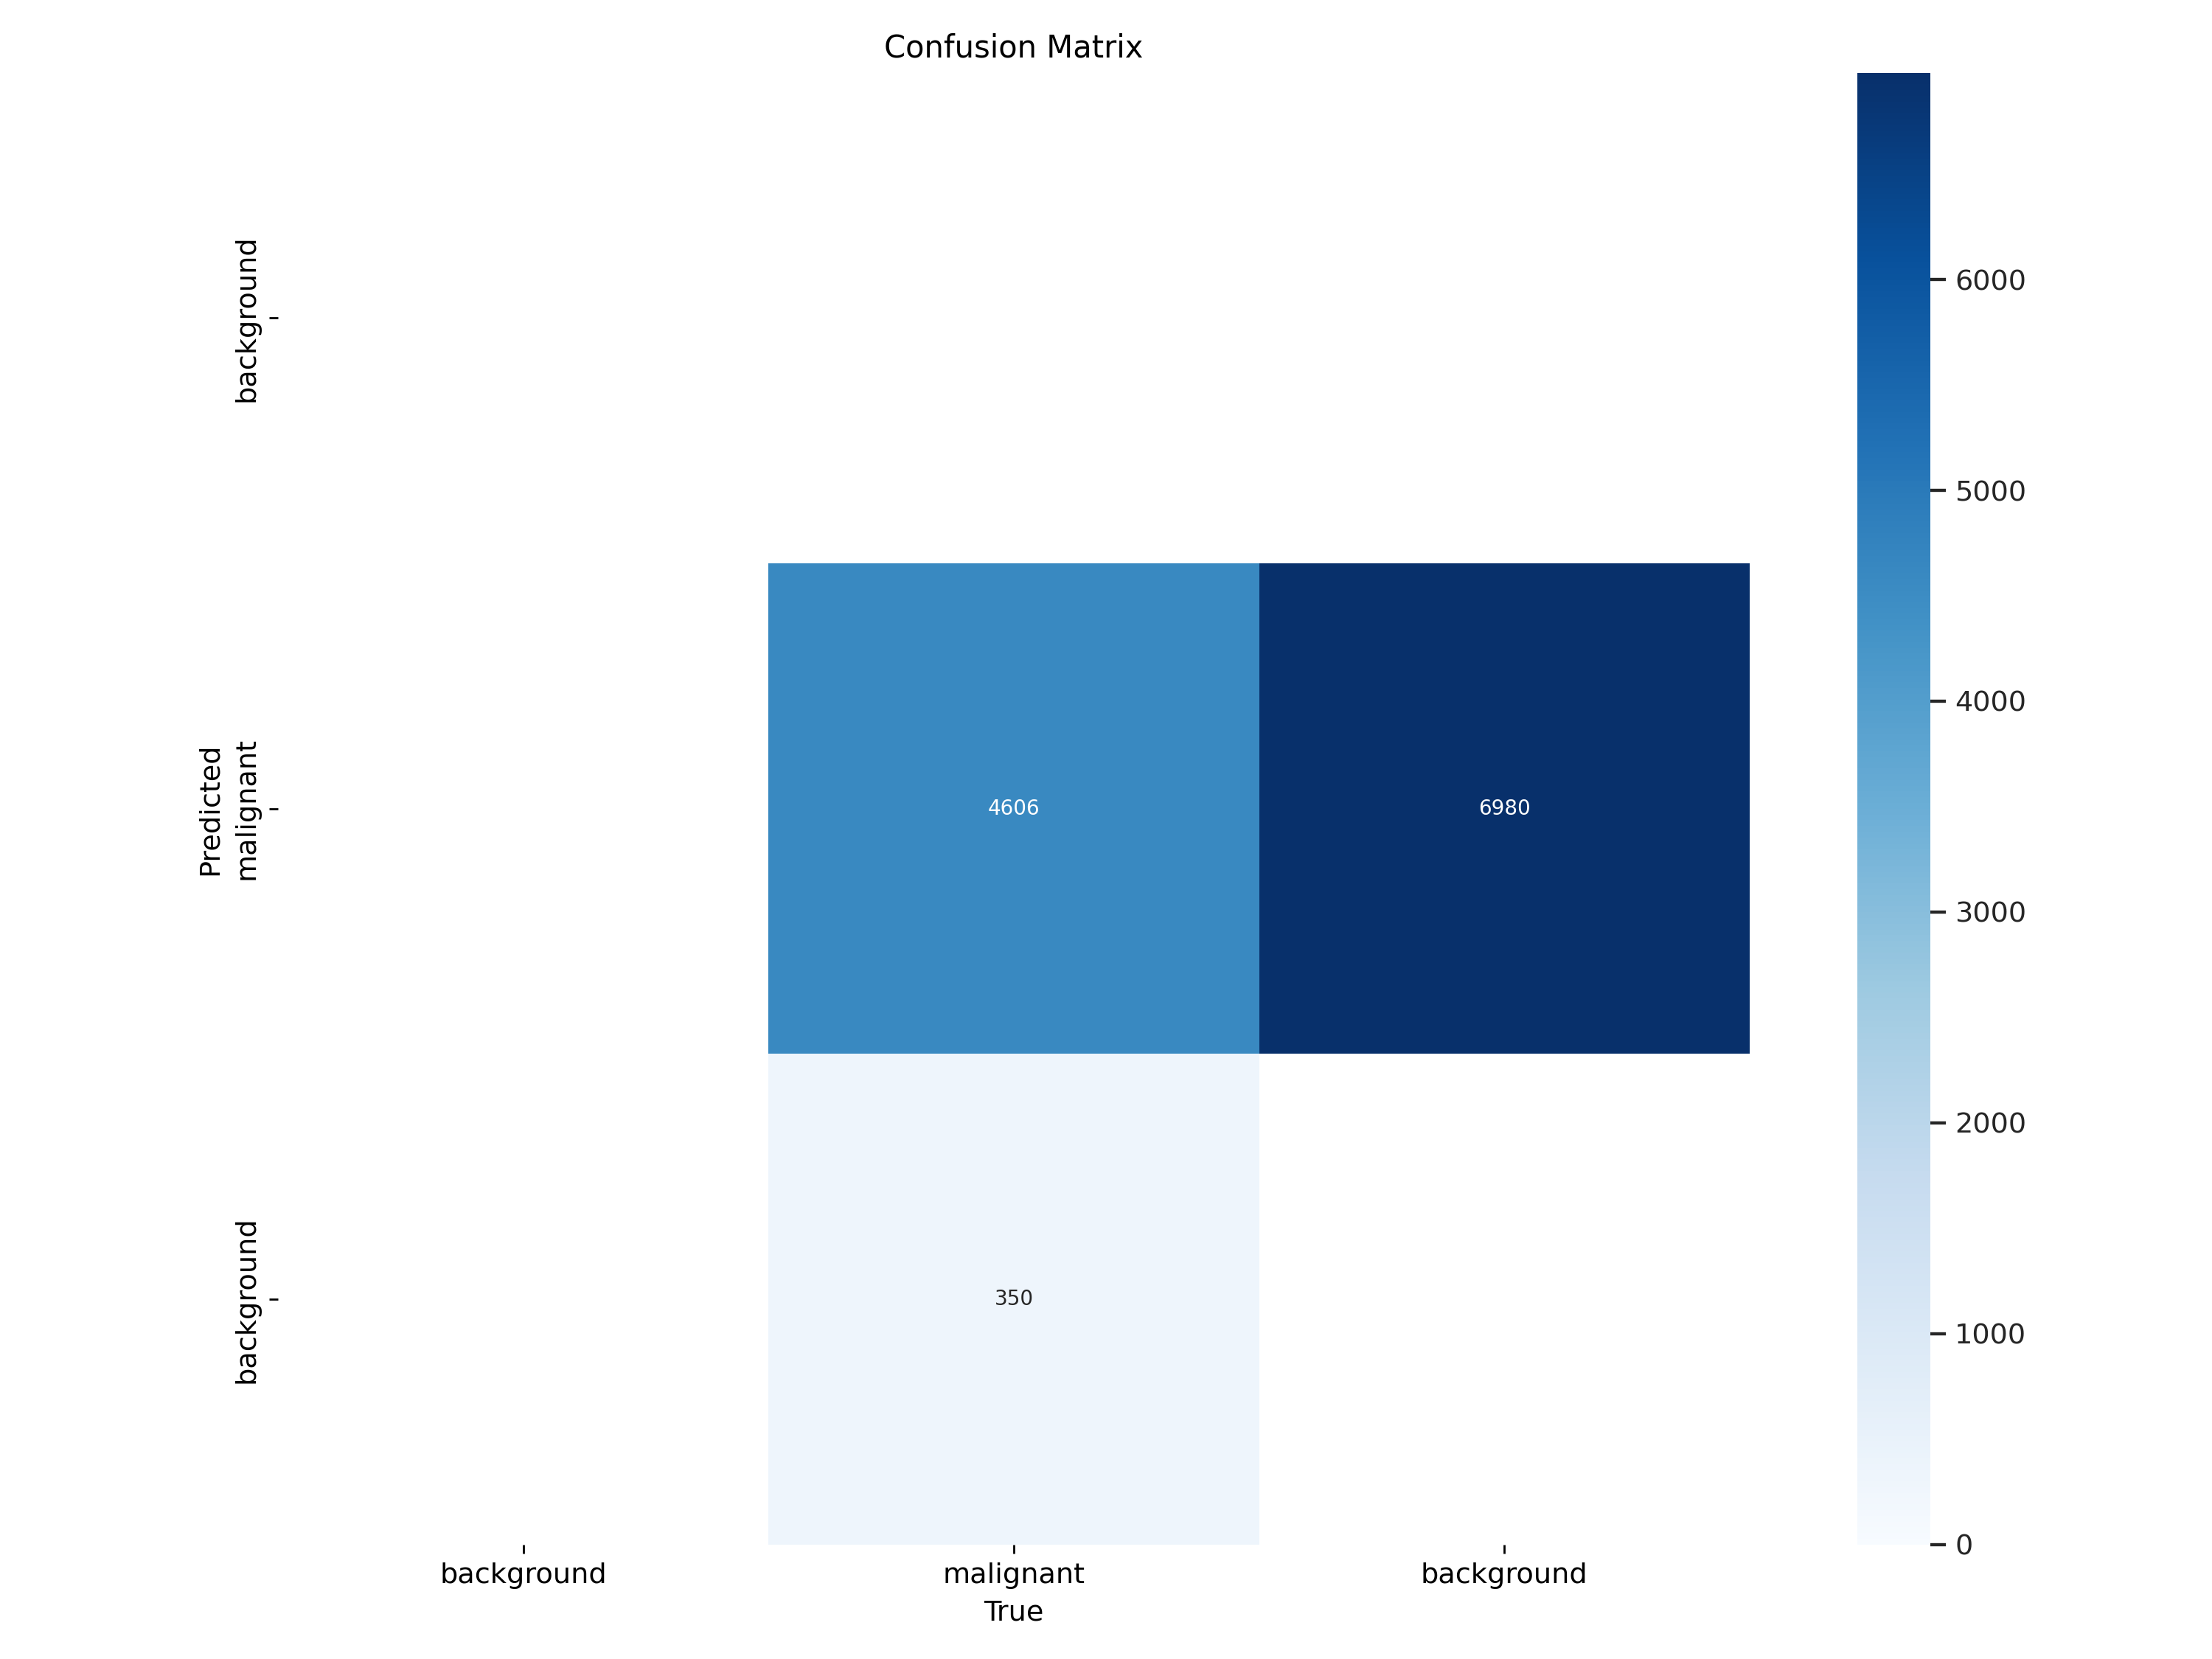

In [10]:
from IPython.display import display, Image
Image(filename='/kaggle/working/runs/detect/val/confusion_matrix.png', width=800)

In [11]:
metrics = model.val(data="/kaggle/working/config.yaml", split="val", save_txt=True, save_conf=True, conf=0.01)

Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2394.5±458.3 MB/s, size: 115.4 KB)


val: Scanning /kaggle/working/dataset/labels/val... 3185 images, 2835 backgrounds, 0 corrupt: 100%|██████████| 3185/3185 [00:01<00:00, 1851.91it/s]


val: New cache created: /kaggle/working/dataset/labels/val.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [01:30<00:00,  2.21it/s]


                   all       3185        373      0.617      0.499      0.491      0.287
             malignant        350        373      0.617      0.499      0.491      0.287


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 26.5ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/val2


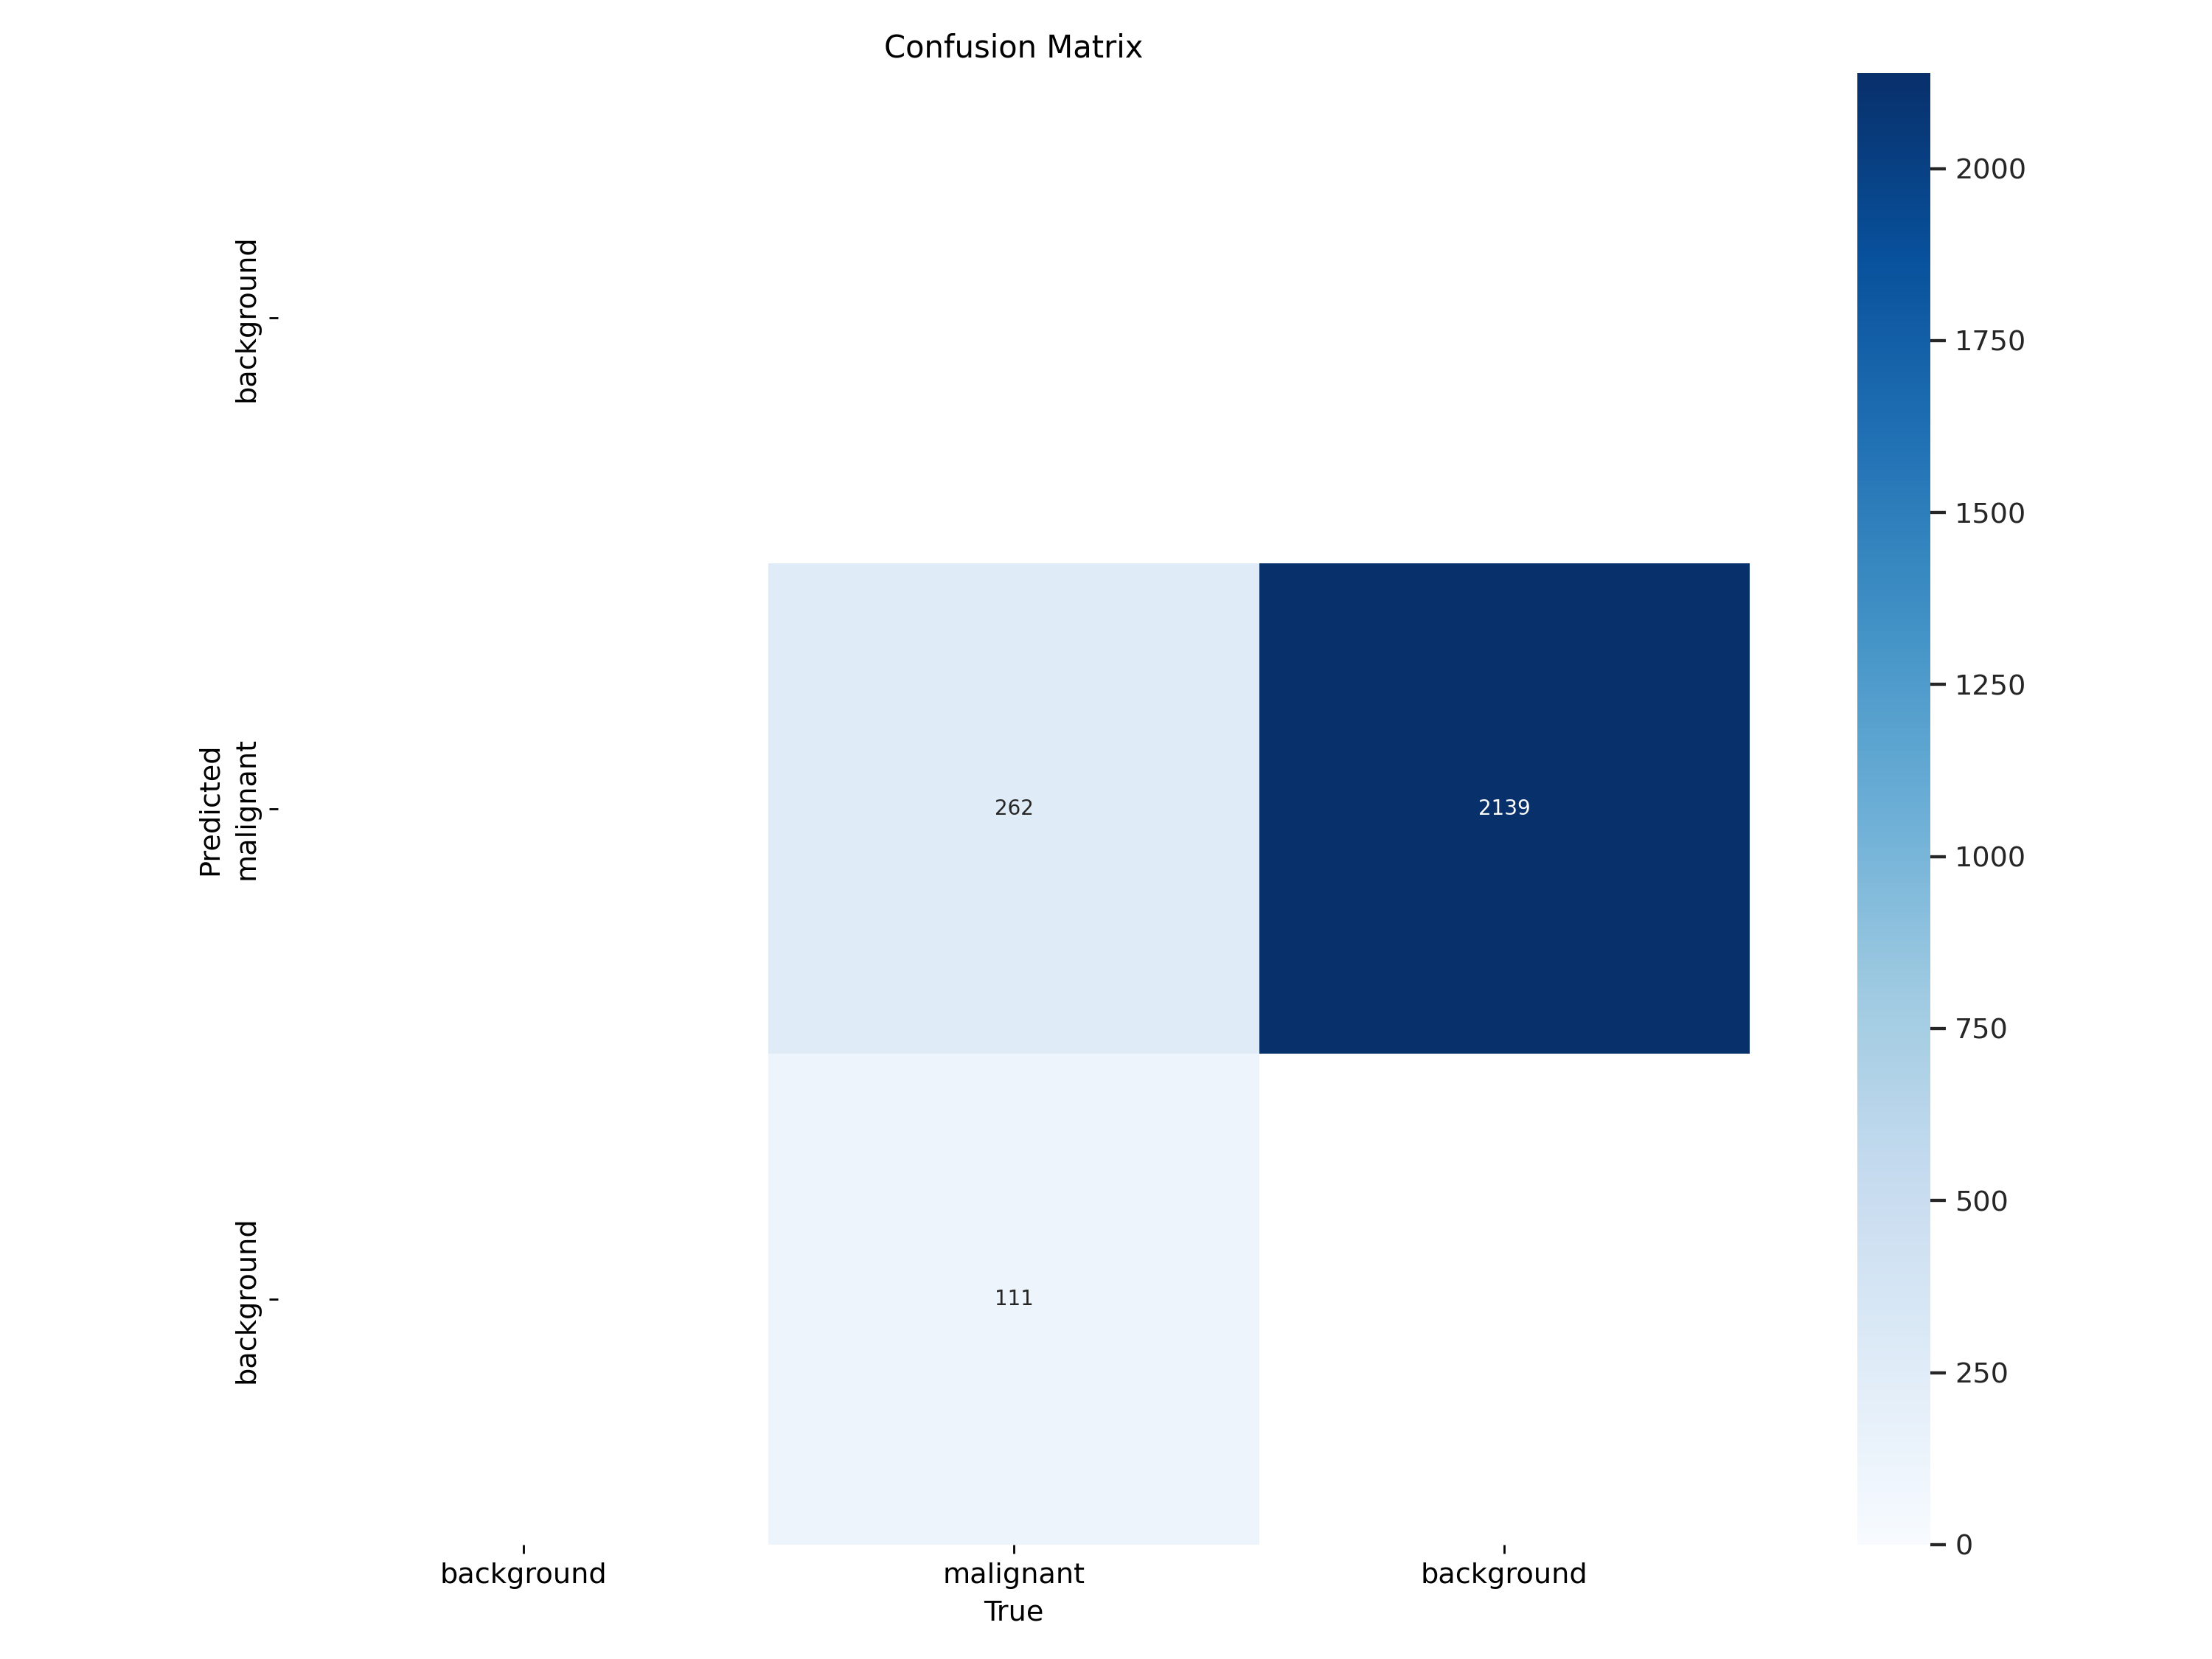

In [12]:
from IPython.display import display, Image
Image(filename='/kaggle/working/runs/detect/val2/confusion_matrix.png', width=800)

In [13]:
metrics = model.val(data="/kaggle/working/config.yaml", split="test", save_txt=True, save_conf=True, conf=0.01)

Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2474.3±683.2 MB/s, size: 130.4 KB)


val: Scanning /kaggle/working/dataset/labels/test... 3141 images, 2865 backgrounds, 0 corrupt: 100%|██████████| 3141/3141 [00:01<00:00, 2026.48it/s]

val: New cache created: /kaggle/working/dataset/labels/test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 197/197 [01:29<00:00,  2.21it/s]


                   all       3141        286      0.623      0.626      0.609      0.376
             malignant        276        286      0.623      0.626      0.609      0.376


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 26.5ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/val3


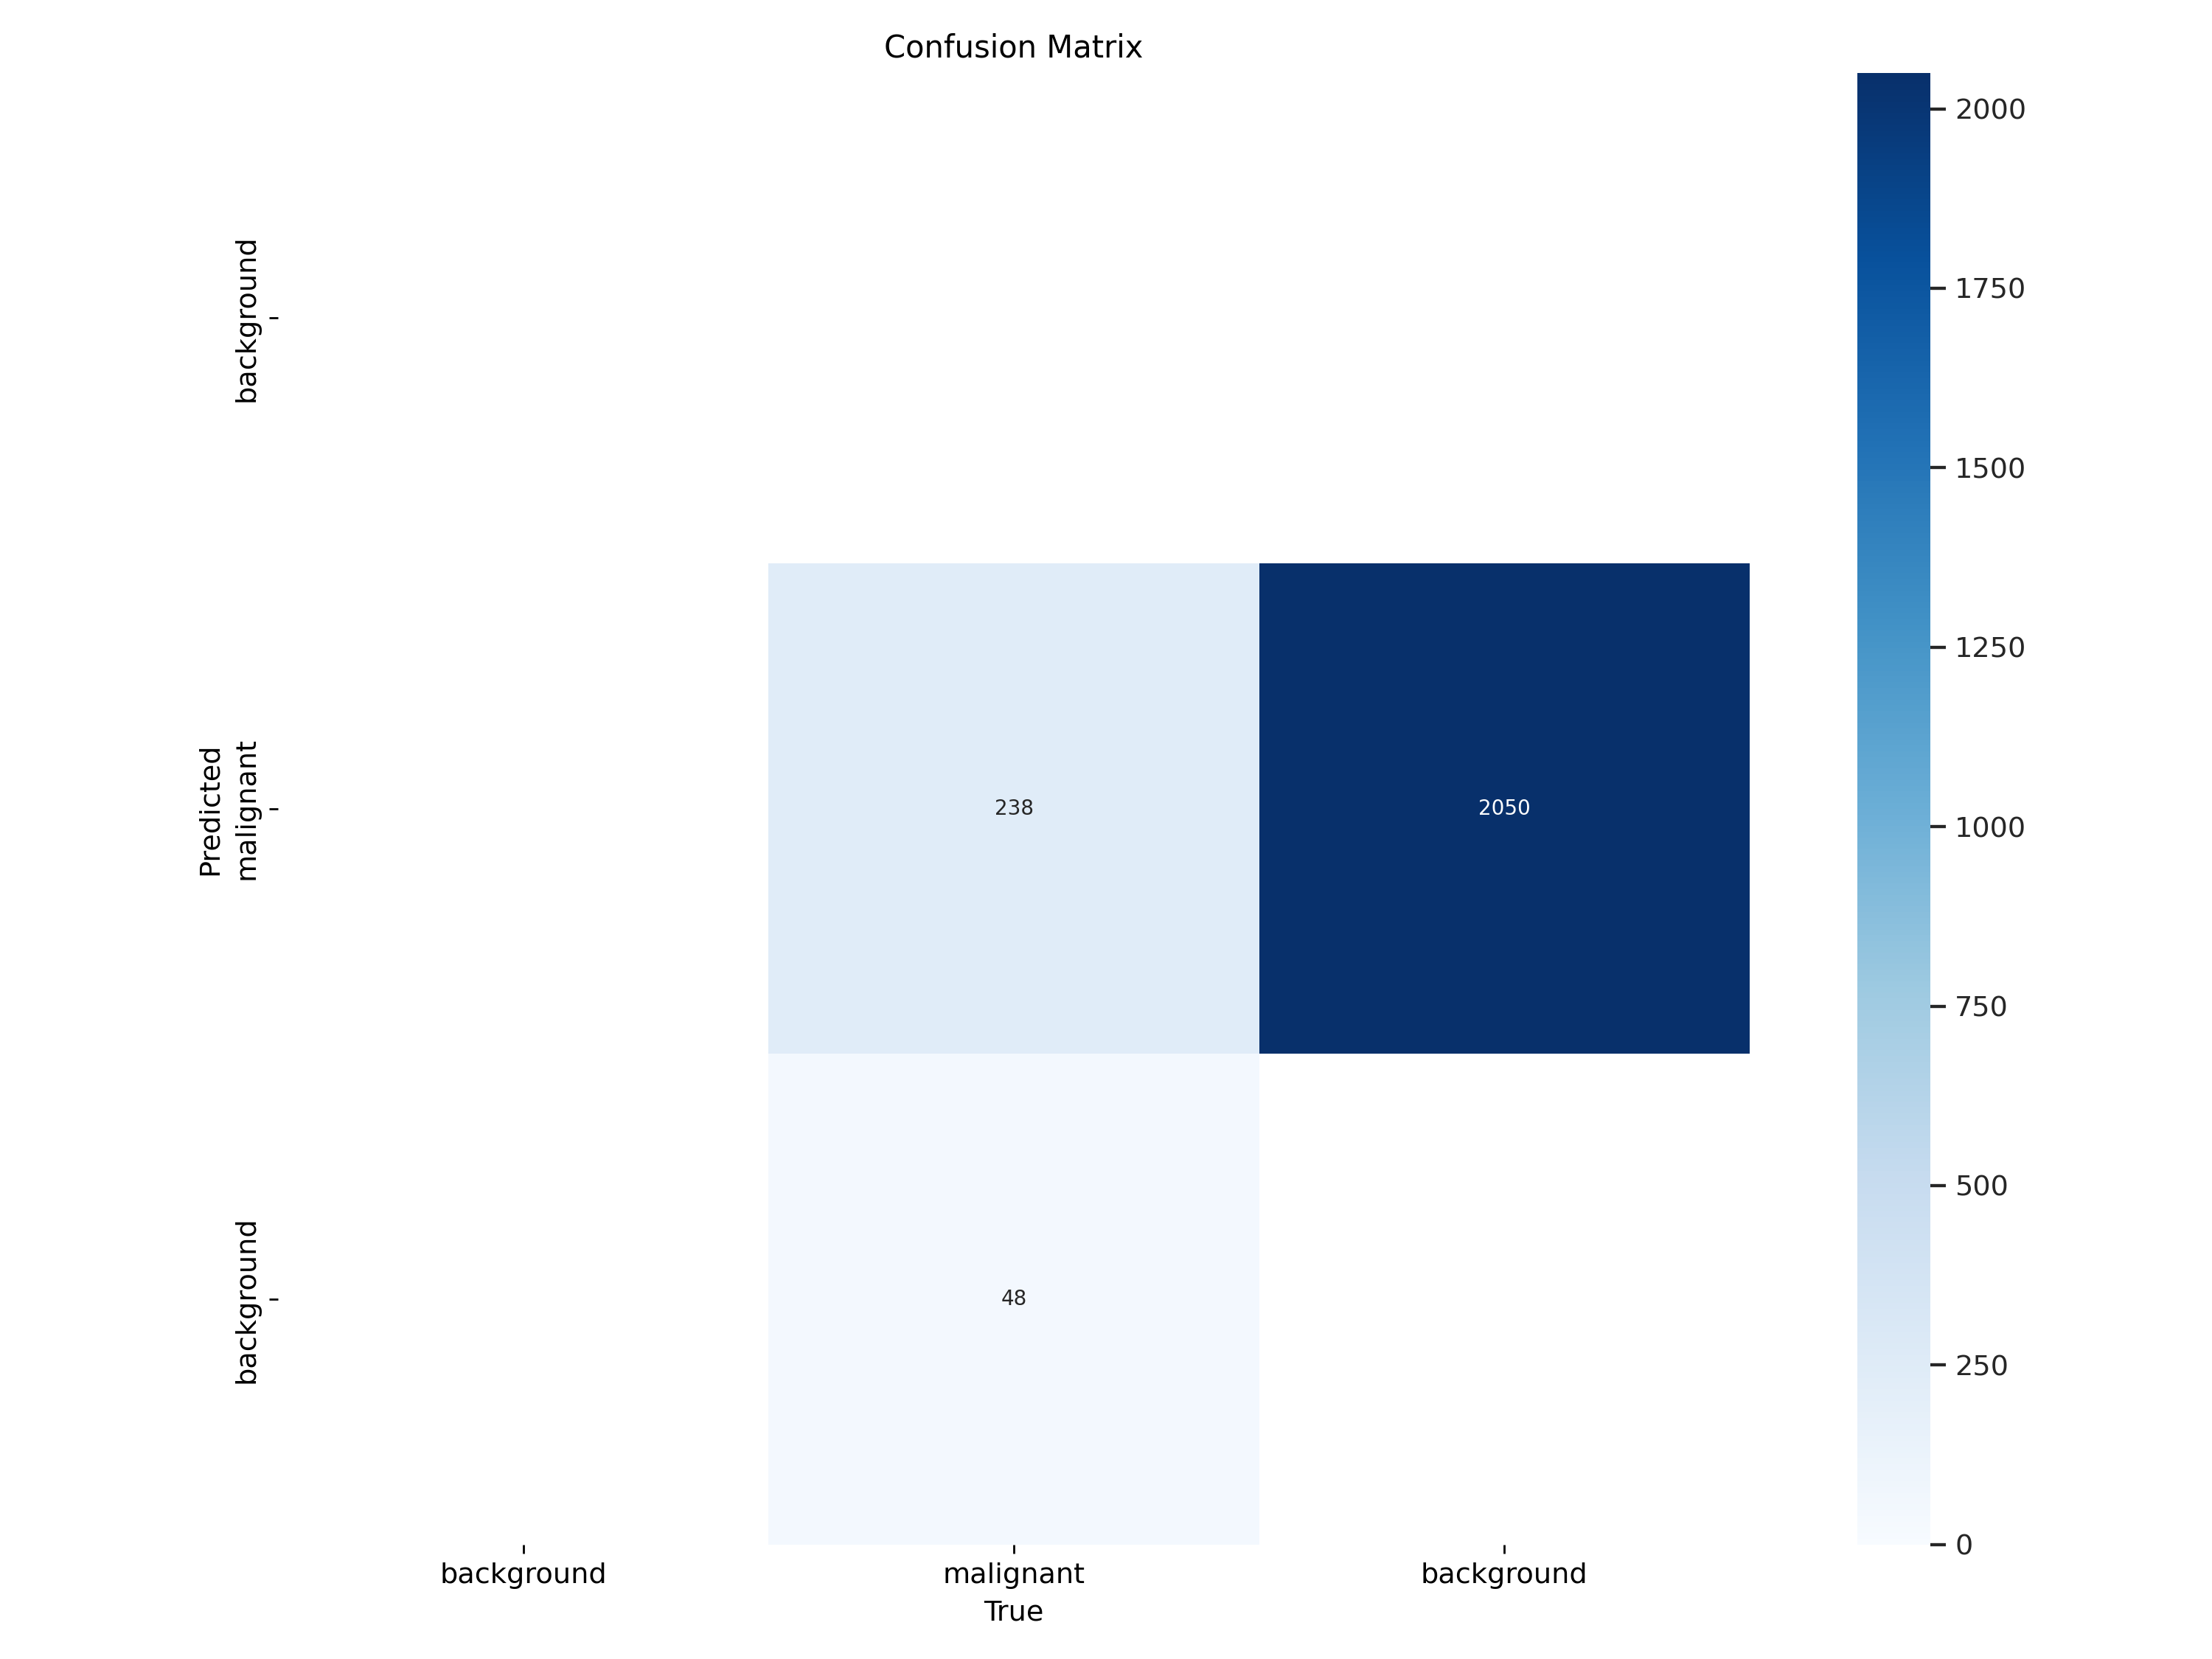

In [14]:
from IPython.display import display, Image
Image(filename='/kaggle/working/runs/detect/val3/confusion_matrix.png', width=800)

In [46]:
!mkdir for_classification
!mkdir for_classification/train
!mkdir for_classification/val
!mkdir for_classification/test
!mkdir for_classification/train/malignant
!mkdir for_classification/train/non-malignant
!mkdir for_classification/val/malignant
!mkdir for_classification/val/non-malignant
!mkdir for_classification/test/malignant
!mkdir for_classification/test/non-malignant

In [47]:
import os
import numpy as np
from PIL import Image

def yolo_to_xyxy(box, img_w, img_h):
    x_c, y_c, w, h = box
    x1 = (x_c - w / 2) * img_w
    y1 = (y_c - h / 2) * img_h
    x2 = (x_c + w / 2) * img_w
    y2 = (y_c + h / 2) * img_h
    return [x1, y1, x2, y2]

def compute_iou(box1, box2):
    xi1 = max(box1[0], box2[0])
    yi1 = max(box1[1], box2[1])
    xi2 = min(box1[2], box2[2])
    yi2 = min(box1[3], box2[3])
    inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area else 0
import numpy as np

def crop_with_padding(image, x1, y1, x2, y2):
    h, w = image.shape[:2]
    channels = 1 if image.ndim == 2 else image.shape[2]
    

    crop_h = y2 - y1
    crop_w = x2 - x1


    result = np.zeros((crop_h, crop_w), dtype=image.dtype)



    x1_img = max(x1, 0)
    y1_img = max(y1, 0)
    x2_img = min(x2, w)
    y2_img = min(y2, h)


    x1_res = x1_img - x1
    y1_res = y1_img - y1
    x2_res = x1_res + (x2_img - x1_img)
    y2_res = y1_res + (y2_img - y1_img)


    result[y1_res:y2_res, x1_res:x2_res] = image[y1_img:y2_img, x1_img:x2_img]

    return result


def process_boxes(pred_folder, gt_folder, dest_folder, source_folder, img_w, img_h, bbox_width, iou_thresh=0.5):


    for file in tqdm(os.listdir(pred_folder)):
        pred_path = os.path.join(pred_folder, file)
        gt_path = os.path.join(gt_folder, file)

        if not os.path.exists(gt_path):
            continue

        preds = np.loadtxt(pred_path).reshape(-1, 6)
        gts = np.loadtxt(gt_path).reshape(-1, 5)

        gt_boxes = [yolo_to_xyxy(gt[1:], img_w, img_h) for gt in gts]
        pred_boxes = [yolo_to_xyxy(pred[1:5], img_w, img_h) for pred in preds]



        img_path = source_folder+file[:-4]+'.png'
        #print(img_path)
        img = Image.open(img_path)
        img = np.array(img, dtype=np.uint8)

        
        matched_gt = set()
        for pred, box in zip(preds, pred_boxes):
            w = box[2] - box[0]
            h = box[3] - box[1]
            area = w * h
            correct = 0

            for i, gt_box in enumerate(gt_boxes):
                iou = compute_iou(box, gt_box)
                if iou >= iou_thresh and i not in matched_gt:
                    correct = 1
                    matched_gt.add(i)
                    break
                elif iou >= iou_thresh and i in matched_gt :
                    correct = 2
                    break
            if correct==2 :
                continue
            center_x=int((box[0]+box[2])//2)
            center_y=int((box[1]+box[3])//2)
            #print(center_x, center_y)
            image=crop_with_padding(img, center_x-bbox_width//2, center_y-bbox_width//2, center_x+bbox_width//2, center_y+bbox_width//2)
            #image=img[center_y-bbox_width//2:center_y+bbox_width//2, center_x-bbox_width//2:center_x+bbox_width//2]
            image = Image.fromarray(image)
            if correct :
                new_name=dest_folder+'/malignant/'+file[:-4]+'_'+str(area)+'_'+str(w)+'_'+str(h)+'_'+str(pred[-1])+'.png'
            else :
                new_name=dest_folder+'/non-malignant/'+file[:-4]+'_'+str(area)+'_'+str(w)+'_'+str(h)+'_'+str(pred[-1])+'.png'
            image.save(new_name)



In [45]:
'''
import os
import shutil

folder_path = '/kaggle/working/for_classification'

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)  # удалить файл или ссылку
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)  # удалить папку рекурсивно
    except Exception as e:
        print(f"Ошибка при удалении {file_path}: {e}")
'''

In [48]:
process_boxes('/kaggle/working/runs/detect/val/labels', '/kaggle/working/dataset/labels/train',
              '/kaggle/working/for_classification/train/','/kaggle/working/dataset/images/train/', img_w=512, img_h=512, bbox_width=80)

  0%|          | 0/6068 [00:00<?, ?it/s]/tmp/ipykernel_35/1606726777.py:66: UserWarning: loadtxt: input contained no data: "/kaggle/working/dataset/labels/train/10755.txt"
  gts = np.loadtxt(gt_path).reshape(-1, 5)
/tmp/ipykernel_35/1606726777.py:66: UserWarning: loadtxt: input contained no data: "/kaggle/working/dataset/labels/train/08187.txt"
  gts = np.loadtxt(gt_path).reshape(-1, 5)
/tmp/ipykernel_35/1606726777.py:66: UserWarning: loadtxt: input contained no data: "/kaggle/working/dataset/labels/train/03344.txt"
  gts = np.loadtxt(gt_path).reshape(-1, 5)
/tmp/ipykernel_35/1606726777.py:66: UserWarning: loadtxt: input contained no data: "/kaggle/working/dataset/labels/train/11389.txt"
  gts = np.loadtxt(gt_path).reshape(-1, 5)
  0%|          | 22/6068 [00:00<00:27, 217.18it/s]/tmp/ipykernel_35/1606726777.py:66: UserWarning: loadtxt: input contained no data: "/kaggle/working/dataset/labels/train/03569.txt"
  gts = np.loadtxt(gt_path).reshape(-1, 5)
/tmp/ipykernel_35/1606726777.py:66:

In [49]:
print(len(os.listdir('/kaggle/working/for_classification/train/non-malignant')))
print(len(os.listdir('/kaggle/working/for_classification/train/malignant')))

6619
4560


In [50]:
process_boxes('/kaggle/working/runs/detect/val2/labels', '/kaggle/working/dataset/labels/val',
              '/kaggle/working/for_classification/val/','/kaggle/working/dataset/images/val/', img_w=512, img_h=512, bbox_width=80)

  0%|          | 0/1391 [00:00<?, ?it/s]/tmp/ipykernel_35/1606726777.py:66: UserWarning: loadtxt: input contained no data: "/kaggle/working/dataset/labels/val/00538.txt"
  gts = np.loadtxt(gt_path).reshape(-1, 5)
/tmp/ipykernel_35/1606726777.py:66: UserWarning: loadtxt: input contained no data: "/kaggle/working/dataset/labels/val/00399.txt"
  gts = np.loadtxt(gt_path).reshape(-1, 5)
/tmp/ipykernel_35/1606726777.py:66: UserWarning: loadtxt: input contained no data: "/kaggle/working/dataset/labels/val/00428.txt"
  gts = np.loadtxt(gt_path).reshape(-1, 5)
/tmp/ipykernel_35/1606726777.py:66: UserWarning: loadtxt: input contained no data: "/kaggle/working/dataset/labels/val/02130.txt"
  gts = np.loadtxt(gt_path).reshape(-1, 5)
/tmp/ipykernel_35/1606726777.py:66: UserWarning: loadtxt: input contained no data: "/kaggle/working/dataset/labels/val/02898.txt"
  gts = np.loadtxt(gt_path).reshape(-1, 5)
/tmp/ipykernel_35/1606726777.py:66: UserWarning: loadtxt: input contained no data: "/kaggle/wor

In [51]:
process_boxes('/kaggle/working/runs/detect/val3/labels', '/kaggle/working/dataset/labels/test',
              '/kaggle/working/for_classification/test/','/kaggle/working/dataset/images/test/', img_w=512, img_h=512, bbox_width=80)

  0%|          | 0/1318 [00:00<?, ?it/s]/tmp/ipykernel_35/1606726777.py:66: UserWarning: loadtxt: input contained no data: "/kaggle/working/dataset/labels/test/01256.txt"
  gts = np.loadtxt(gt_path).reshape(-1, 5)
/tmp/ipykernel_35/1606726777.py:66: UserWarning: loadtxt: input contained no data: "/kaggle/working/dataset/labels/test/01920.txt"
  gts = np.loadtxt(gt_path).reshape(-1, 5)
/tmp/ipykernel_35/1606726777.py:66: UserWarning: loadtxt: input contained no data: "/kaggle/working/dataset/labels/test/03108.txt"
  gts = np.loadtxt(gt_path).reshape(-1, 5)
/tmp/ipykernel_35/1606726777.py:66: UserWarning: loadtxt: input contained no data: "/kaggle/working/dataset/labels/test/00428.txt"
  gts = np.loadtxt(gt_path).reshape(-1, 5)
/tmp/ipykernel_35/1606726777.py:66: UserWarning: loadtxt: input contained no data: "/kaggle/working/dataset/labels/test/02130.txt"
  gts = np.loadtxt(gt_path).reshape(-1, 5)
/tmp/ipykernel_35/1606726777.py:66: UserWarning: loadtxt: input contained no data: "/kaggl

In [52]:
print(len(os.listdir('/kaggle/working/for_classification/val/non-malignant')))
print(len(os.listdir('/kaggle/working/for_classification/val/malignant')))
print(len(os.listdir('/kaggle/working/for_classification/test/non-malignant')))
print(len(os.listdir('/kaggle/working/for_classification/test/malignant')))

2113
257
2030
236


In [53]:
import shutil
shutil.make_archive("data_for_classification", "zip", "/kaggle/working/for_classification")


'/kaggle/working/data_for_classification.zip'